<a href="https://colab.research.google.com/github/XD-Jing/.mac.config/blob/master/hzz-high-mass/selection_optimization_metsig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title import matplotlib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
plt.style.use('seaborn-ticks')
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats( 'svg')

In [0]:
#@title load google drive
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

spreadsheet = gc.open('selection-optimization-metsig-scan')

pflowa = get_as_dataframe(spreadsheet.worksheet('pflow-mc16a')).dropna().sort_values(by='metsig')
pflowd = get_as_dataframe(spreadsheet.worksheet('pflow-mc16d')).dropna().sort_values(by='metsig')
emtopoa = get_as_dataframe(spreadsheet.worksheet('emtopo-mc16a')).dropna().sort_values(by='metsig')
emtopod = get_as_dataframe(spreadsheet.worksheet('emtopo-mc16d')).dropna().sort_values(by='metsig')

from google.colab import drive
drive.mount('/gdrive')
import os

In [0]:
#@title single curve plotting function
def plot_comparison(nominal, stat, ytitle, filename, ylim, leg_loc='lower right'):

#     fig, ax = plt.subplots(figsize=(6, 4), dpi=200)
    fig, ax = plt.subplots()
    ax.plot(
        pflowa['metsig'],
        pflowa[nominal],
        color='blue',
        linestyle='-',
        label='PFlow mc16a',
        linewidth=2)
    ax.fill_between(
        pflowa['metsig'],
        pflowa[nominal] - pflowa[stat],
        pflowa[nominal] + pflowa[stat],
        color='blue',
        alpha=0.3)


    ax.plot(
        pflowd['metsig'],
        pflowd[nominal],
        color='red',
        linestyle='-',
        label='PFlow mc16d',
        linewidth=2)
    ax.fill_between(
        pflowd['metsig'],
        pflowd[nominal] - pflowd[stat],
        pflowd[nominal] + pflowd[stat],
        color='red',
        alpha=0.3)


    ax.plot(
        emtopoa['metsig'],
        emtopoa[nominal],
        color='blue',
        linestyle=':',
        label='EMTopo mc16a',
        linewidth=2)
    ax.fill_between(
        emtopoa['metsig'],
        emtopoa[nominal] - emtopoa[stat],
        emtopoa[nominal] + emtopoa[stat],
        color='blue',
        alpha=0.3)


    ax.plot(
        emtopod['metsig'],
        emtopod[nominal],
        color='red',
        linestyle=':',
        label='EMTopo mc16d',
        linewidth=2)
    ax.fill_between(
        emtopod['metsig'],
        emtopod[nominal] - emtopod[stat],
        emtopod[nominal] + emtopod[stat],
        color='red',
        alpha=0.3)


    # ax1.plot(data['MetSig'], np.ones(data['MetSig'].shape)*2.38554,'b--', label = 'original selection', linewidth = 2)
    ax.set_xlabel('MetSig Cut', horizontalalignment='right', x=1.0)
    ax.set_ylabel(ytitle)
#     ax.tick_params('y', direction='in', length=5, width=1)
#     ax.tick_params('x', direction='in', length=5, width=1)
    ax.tick_params(axis='both', which='both', direction='in')
    ax.tick_params(axis='both', which='both', top=True, right=True)
    ax.set_ylim(ylim)
    ax.legend(loc=leg_loc)

    plt.savefig(os.path.join('/gdrive/My Drive/HZZ-HighMass', filename))
    print(os.path.join('/gdrive/My Drive/HZZ-HighMass', filename))
    plt.show()

/gdrive/My Drive/HZZ-HighMass/Asimov600-MetSig.pdf


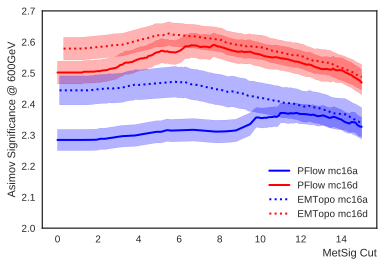

In [0]:
#@ ggH600GeV
plot_comparison(
    nominal='asimov6.n',
    stat='asimov6.s',
    ytitle='Asimov Significance @ 600GeV',
    filename='Asimov600-MetSig.pdf',
    ylim=(2, 2.7))

/gdrive/My Drive/HZZ-HighMass/Asimov1000-MetSig.pdf


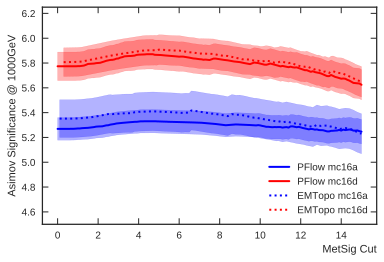

In [0]:
plot_comparison(
    nominal='asimov10.n',
    stat='asimov10.s',
    ytitle='Asimov Significance @ 1000GeV',
    filename='Asimov1000-MetSig.pdf',
    ylim=(4.5, 6.25))

/gdrive/My Drive/HZZ-HighMass/SSB600-MetSig.pdf


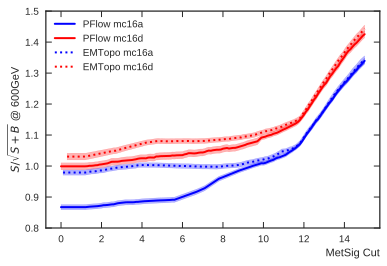

In [0]:
plot_comparison(
    nominal='ssb6.n',
    stat='ssb6.s',
    ytitle=r'$S/\sqrt{S+B}$ @ 600GeV',
    filename='SSB600-MetSig.pdf',
    ylim=(0.8, 1.5),
    leg_loc='upper left')

/gdrive/My Drive/HZZ-HighMass/SSB1000-MetSig.pdf


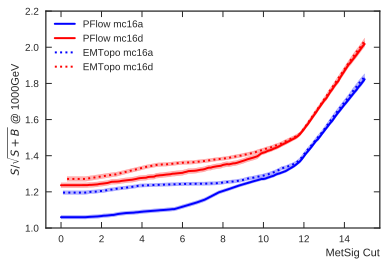

In [0]:
plot_comparison(
    nominal='ssb10.n',
    stat='ssb10.s',
    ytitle=r'$S/\sqrt{S+B}$ @ 1000GeV',
    filename='SSB1000-MetSig.pdf',
    ylim=(1.0, 2.2),
    leg_loc='upper left')

/gdrive/My Drive/HZZ-HighMass/ggH1000.pdf


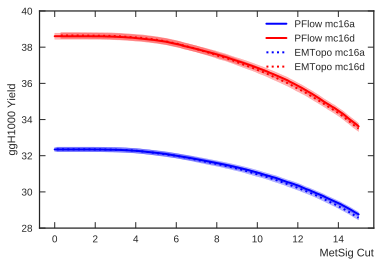

In [0]:
plot_comparison(
    nominal='ggH1000.n',
    stat='ggH1000.s',
    ytitle=r'ggH1000 Yield',
    filename='ggH1000.pdf',
    ylim=(28, 40),
    leg_loc='upper right')

/gdrive/My Drive/HZZ-HighMass/ZJets.pdf


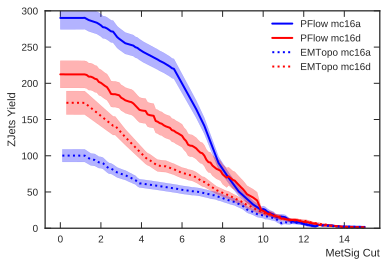

In [0]:
plot_comparison(
    nominal='ZJets.n',
    stat='ZJets.s',
    ytitle=r'ZJets Yield',
    filename='ZJets.pdf',
    ylim=(0, 300),
    leg_loc='upper right')

/gdrive/My Drive/HZZ-HighMass/WZ.pdf


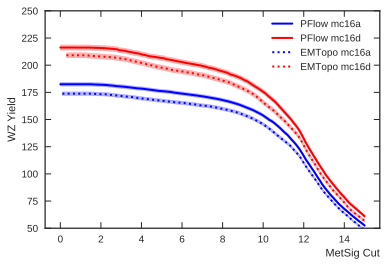

In [0]:
plot_comparison(
    nominal='WZ.n',
    stat='WZ.s',
    ytitle=r'WZ Yield',
    filename='WZ.pdf',
    ylim=(50, 250),
    leg_loc='upper right')

/gdrive/My Drive/HZZ-HighMass/NonRes.pdf


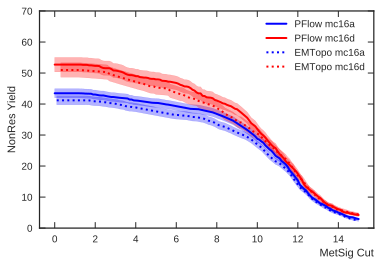

In [0]:
plot_comparison(
    nominal='NonRes.n',
    stat='NonRes.s',
    ytitle=r'NonRes Yield',
    filename='NonRes.pdf',
    ylim=(0, 70),
    leg_loc='upper right')

/gdrive/My Drive/HZZ-HighMass/ggZZ.pdf


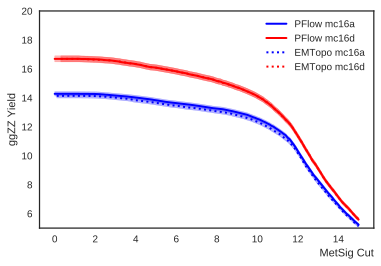

In [0]:
plt.style.use('seaborn-white')
plot_comparison(
    nominal='ggZZ.n',
    stat='ggZZ.s',
    ytitle=r'ggZZ Yield',
    filename='ggZZ.pdf',
    ylim=(5, 20),
    leg_loc='upper right')

/gdrive/My Drive/HZZ-HighMass/qqZZ.pdf


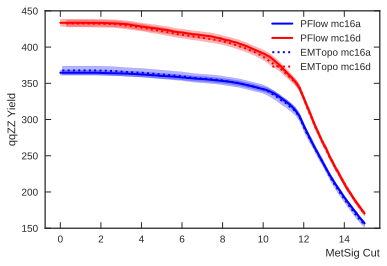

In [24]:
plot_comparison(
    nominal='qqZZ.n',
    stat='qqZZ.s',
    ytitle=r'qqZZ Yield',
    filename='qqZZ.pdf',
    ylim=(150, 450),
    leg_loc='upper right')